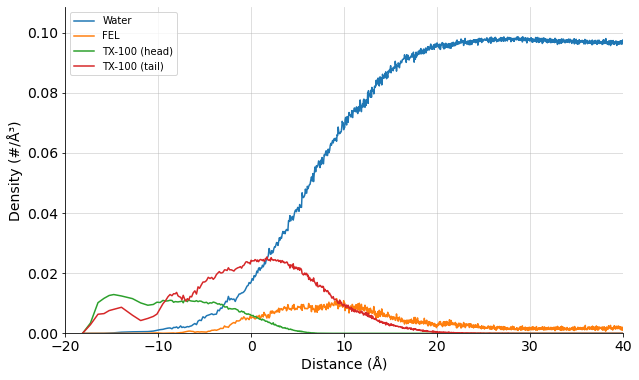

In [5]:

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

# Plot each group with different colors and labels
for label, (distances, densities) in density_data.items():
    plt.plot(distances, densities, label=label)

# Customize the plot
plt.xlabel("Distance (Å)",fontsize=14)
plt.ylabel("Density (#/Å³)",fontsize=14)
#plt.title("Density Profiles of SOL, ASP, and OLE Heads/Tails in TRITO")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=14)  # Increased x-axis tick labels font size
plt.yticks(fontsize=14)  # Increased y-axis tick labels font size

plt.savefig('densityasp_t1000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/home/melissa/miniconda3/envs/mdaenv/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Wrapping trajectory...
Running density calculation for the following atom group: resname SOL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  204.12574519500004
Running density calculation for the following atom group: resname ASP


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  51.123259870999846
Running density calculation for the following atom group: resname TRITO and (name C19 C20 C21 C22 C23 C24)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  50.89430612100023
Running density calculation for the following atom group: resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  52.969574265999654


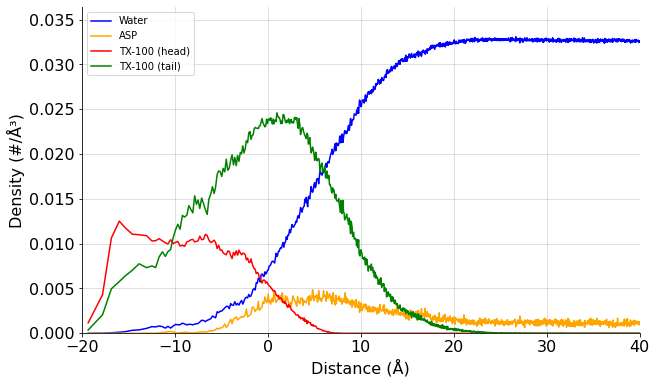

In [1]:
from PUCHIK import Interface
import matplotlib.pyplot as plt

# Define file paths
trj = 'project3/asp_trx/merged_trajectory.xtc'
top = 'project3/asp_trx/asp900ns.tpr'

# Initialize the Interface with trajectory and topology files
m = Interface(trj, top)

# Select all atoms and structure for the calculations
m.select_atoms('all')
m.select_structure('resname TRITO and (name C19 C20 C21 C22 C23 C24)')  # Setting TRITO as the interface structure

# Dictionary to store density data for each group
density_data = {}

# Calculate density for each atom group
# Water (SOL)
density_selection_sol = 'resname SOL'
distances_sol, densities_sol = m.calculate_density(density_selection_sol, start=0, end=1000, skip=2, norm_bin_count=12)
densities_sol = [d/3 for d in densities_sol]
density_data['Water'] = (distances_sol, densities_sol)

# ASP
density_selection_asp = 'resname ASP'
distances_asp, densities_asp = m.calculate_density(density_selection_asp, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['ASP'] = (distances_asp, densities_asp)

# OLE Heads within TRITO (using oxygen atoms as heads)
density_selection_ole_heads = 'resname TRITO and (name C19 C20 C21 C22 C23 C24)'  # Selects all oxygen atoms as head group
distances_ole_heads, densities_ole_heads = m.calculate_density(density_selection_ole_heads, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (head)'] = (distances_ole_heads, densities_ole_heads)

# OLE Tails within TRITO (using carbon atoms as tails)
density_selection_ole_tails = 'resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)'  # Selects all carbon atoms as tail group
distances_ole_tails, densities_ole_tails = m.calculate_density(density_selection_ole_tails, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (tail)'] = (distances_ole_tails, densities_ole_tails)

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

# Plot each group with different colors and labels
# Plot each group with specific colors
for label, (distances, densities) in density_data.items():
    if label == 'TX-100 (head)':
        plt.plot(distances, densities, label=label, color='red')
    elif label == 'TX-100 (tail)':
        plt.plot(distances, densities, label=label, color='green')
    elif label == 'Water':
        plt.plot(distances, densities, label=label, color='blue')
    elif label == 'ASP':
        plt.plot(distances, densities, label=label, color='orange')

# Customize the plot
plt.xlabel("Distance (Å)",fontsize=16)
plt.ylabel("Density (#/Å³)",fontsize=16)
#plt.title("Density Profiles of SOL, ASP, and OLE Heads/Tails in TRITO")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=16)  # Increased x-axis tick labels font size
plt.yticks(fontsize=16)  # Increased y-axis tick labels font size

plt.savefig('densityasp_t1000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [1]:
from PUCHIK import Interface
import matplotlib.pyplot as plt

# Define file paths
trj = 'project3/aten_trx/merged_aten.xtc'
top = 'project3/aten_trx/aten900ns.tpr'

# Initialize the Interface with trajectory and topology files
m = Interface(trj, top)

# Select all atoms and structure for the calculations
m.select_atoms('all')
m.select_structure('resname TRITO and (name C19 C20 C21 C22 C23 C24)')  # Setting TRITO as the interface structure

# Dictionary to store density data for each group
density_data = {}

# Calculate density for each atom group
# Water (SOL)
density_selection_sol = 'resname SOL'
distances_sol, densities_sol = m.calculate_density(density_selection_sol, start=0, end=1000, skip=2, norm_bin_count=12)
densities_sol = [d/3 for d in densities_sol]
density_data['Water'] = (distances_sol, densities_sol)

# Print raw density values for water before normalization
print("Water distances:", distances_sol)
print("Water densities (before normalization):", densities_sol)

# Count waters in distance range -10 to 0
mask = (distances_sol >= -10) & (distances_sol <= 0)
waters_in_range = sum(densities_sol[mask])
count_bins_in_range = sum(mask)
print(f"Number of water density bins in range -10 to 0 Å: {count_bins_in_range}")
print(f"Total water density in range -10 to 0 Å: {waters_in_range:.4f}")
print(f"Distance values in range -10 to 0 Å: {distances_sol[mask]}")
print(f"Density values in range -10 to 0 Å: {densities_sol[mask]}")

# ASP
density_selection_asp = 'resname ATEN'
distances_asp, densities_asp = m.calculate_density(density_selection_asp, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['ATEN'] = (distances_asp, densities_asp)
# Check where ATEN molecules are located
print("ATEN distances:", distances_asp)
print("ATEN densities:", densities_asp)

# Count ATEN in micelle core (-10 to 0)
mask_aten = (distances_asp >= -10) & (distances_asp <= 0)
aten_in_core = sum(densities_asp[mask_aten])
print(f"ATEN density in micelle core (-10 to 0 Å): {aten_in_core:.4f}")

# OLE Heads within TRITO (using oxygen atoms as heads)
density_selection_ole_heads = 'resname TRITO and (name C19 C20 C21 C22 C23 C24)'  # Selects all oxygen atoms as head group
distances_ole_heads, densities_ole_heads = m.calculate_density(density_selection_ole_heads, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (head)'] = (distances_ole_heads, densities_ole_heads)

# OLE Tails within TRITO (using carbon atoms as tails)
density_selection_ole_tails = 'resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)'  # Selects all carbon atoms as tail group
distances_ole_tails, densities_ole_tails = m.calculate_density(density_selection_ole_tails, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (tail)'] = (distances_ole_tails, densities_ole_tails)

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

for label, (distances, densities) in density_data.items():
    if label == 'TX-100 (head)':
        plt.plot(distances, densities, label=label, color='red')
    elif label == 'TX-100 (tail)':
        plt.plot(distances, densities, label=label, color='green')
    elif label == 'Water':
        plt.plot(distances, densities, label=label, color='blue')
    elif label == 'ATEN':
        plt.plot(distances, densities, label=label, color='orange')


# Customize the plot
plt.xlabel("Distance (Å)",fontsize=16)
plt.ylabel("Density (#/Å³)",fontsize=16)
#plt.title("Density Profiles of SOL, ATEN, and OLE Heads/Tails in TRITO")
plt.legend()
# Set up the grid with specific style matching the reference
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=16)  # Increased x-axis tick labels font size
plt.yticks(fontsize=16)  # Increased y-axis tick labels font size

plt.savefig('densityaten_t1000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/home/melissa/miniconda3/envs/mdaenv/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Wrapping trajectory...
Running density calculation for the following atom group: resname SOL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  196.686659255
Water distances: [-19.29722545 -18.01818454 -17.06710994 ...  69.99752293  70.92628036
  72.23079192]
Water densities (before normalization): [1.933333333333333e-05, 0.00014000000000000007, 0.0002253333333333335, 0.0002453333333333335, 0.0002993333333333336, 0.0002266666666666668, 0.0001413333333333334, 0.00014066666666666676, 0.00018133333333333345, 0.00021933333333333345, 0.00026666666666666684, 0.0003620000000000002, 0.00044400000000000033, 0.0005073333333333337, 0.00048133333333333367, 0.0006666666666666671, 0.0006673333333333337, 0.0008179999999999979, 0.0007379999999999994, 0.000805333333333332, 0.0007599999999999982, 0.0007146666666666659, 0.0009153333333333306, 0.0008813333333333307, 0.0009279999999999969, 0.0011086666666666625, 0.0011766666666666627, 0.0010393333333333294, 0.0010133333333333294, 0.0012959999999999949, 0.001041999999999997, 0.0012173333333333283, 0.0013419999999999953, 0.0014526666666666596, 0.0014946666666666591, 0

TypeError: only integer scalar arrays can be converted to a scalar index

Wrapping trajectory...
Running density calculation for the following atom group: resname SOL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  204.06109793300857
Running density calculation for the following atom group: resname FEL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  77.21867847999965
Running density calculation for the following atom group: resname TRITO and (name C19 C20 C21 C22 C23 C24)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  75.58604220599227
Running density calculation for the following atom group: resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  81.89981210599944


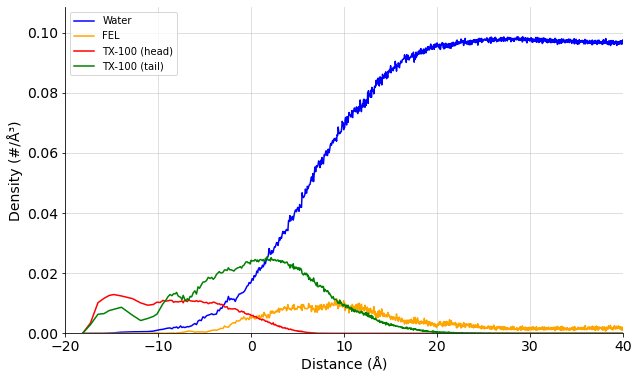

In [4]:
from PUCHIK import Interface
import matplotlib.pyplot as plt

# Define file paths
trj = 'project3/fel_trx/merged_fel.xtc'
top = 'project3/fel_trx/fel900ns.tpr'

# Initialize the Interface with trajectory and topology files
m = Interface(trj, top)

# Select all atoms and structure for the calculations
m.select_atoms('all')
m.select_structure('resname TRITO and (name C19 C20 C21 C22 C23 C24)')  # Setting TRITO as the interface structure

# Dictionary to store density data for each group
density_data = {}

# Calculate density for each atom group
# Water (SOL)
density_selection_sol = 'resname SOL'
distances_sol, densities_sol = m.calculate_density(density_selection_sol, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['Water'] = (distances_sol, densities_sol)

# ASP
density_selection_asp = 'resname FEL'
distances_asp, densities_asp = m.calculate_density(density_selection_asp, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['FEL'] = (distances_asp, densities_asp)

# OLE Heads within TRITO (using oxygen atoms as heads)
density_selection_ole_heads = 'resname TRITO and (name C19 C20 C21 C22 C23 C24)'  # Selects all oxygen atoms as head group
distances_ole_heads, densities_ole_heads = m.calculate_density(density_selection_ole_heads, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (head)'] = (distances_ole_heads, densities_ole_heads)

# OLE Tails within TRITO (using carbon atoms as tails)
density_selection_ole_tails = 'resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)'  # Selects all carbon atoms as tail group
distances_ole_tails, densities_ole_tails = m.calculate_density(density_selection_ole_tails, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (tail)'] = (distances_ole_tails, densities_ole_tails)

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

for label, (distances, densities) in density_data.items():
    if label == 'TX-100 (head)':
        plt.plot(distances, densities, label=label, color='red')
    elif label == 'TX-100 (tail)':
        plt.plot(distances, densities, label=label, color='green')
    elif label == 'Water':
        plt.plot(distances, densities, label=label, color='blue')
    elif label == 'FEL':
        plt.plot(distances, densities, label=label, color='orange')


# Customize the plot
plt.xlabel("Distance (Å)",fontsize=14)
plt.ylabel("Density (#/Å³)",fontsize=14)
plt.legend()

# Set up the grid with specific style matching the reference
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=14)  # Increased x-axis tick labels font size
plt.yticks(fontsize=14)  # Increased y-axis tick labels font size

# Save the plot with high quality
plt.savefig('densityfel_t1000.png', dpi=300, bbox_inches='tight')
plt.show()

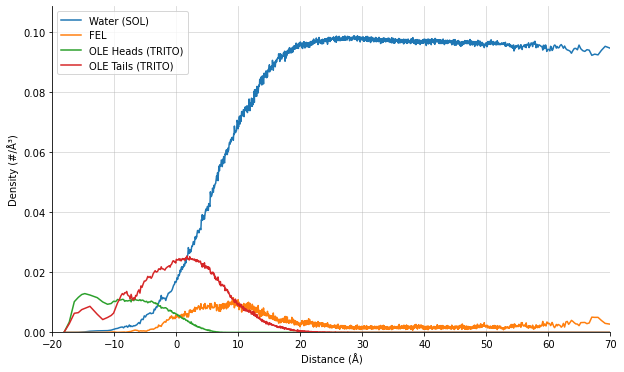

In [9]:
# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

# Plot each group with different colors and labels
for label, (distances, densities) in density_data.items():
    plt.plot(distances, densities, label=label)

# Customize the plot
plt.xlabel("Distance (Å)")
plt.ylabel("Density (#/Å³)")
plt.legend()

# Set up the grid with specific style matching the reference
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 70)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

# Save the plot with high quality
plt.savefig('densityfel_t1000.png', dpi=300, bbox_inches='tight')
plt.show()

Wrapping trajectory...
Running density calculation for the following atom group: resname SOL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  196.83191123099994
Running density calculation for the following atom group: resname ATEN


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  49.991694841000026
Running density calculation for the following atom group: resname TRITO and (name C19 C20 C21 C22 C23 C24)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  46.6979433649999
Running density calculation for the following atom group: resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  49.427158485000064


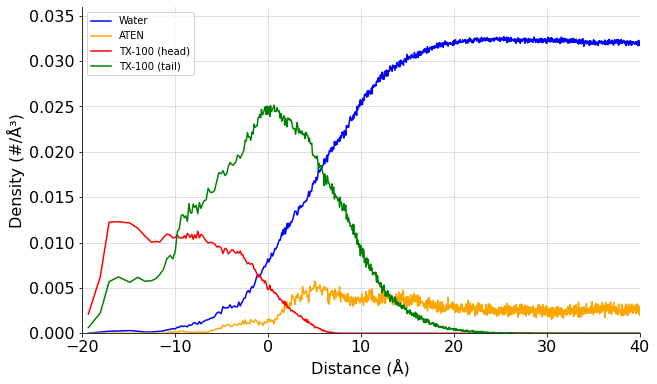

In [2]:
from PUCHIK import Interface
import matplotlib.pyplot as plt

# Define file paths
trj = 'project3/aten_trx/merged_aten.xtc'
top = 'project3/aten_trx/aten900ns.tpr'

# Initialize the Interface with trajectory and topology files
m = Interface(trj, top)

# Select all atoms and structure for the calculations
m.select_atoms('all')
m.select_structure('resname TRITO and (name C19 C20 C21 C22 C23 C24)')  # Setting TRITO as the interface structure

# Dictionary to store density data for each group
density_data = {}

# Calculate density for each atom group
# Water (SOL)
density_selection_sol = 'resname SOL'
distances_sol, densities_sol = m.calculate_density(density_selection_sol, start=0, end=1000, skip=2, norm_bin_count=12)
densities_sol = [d/3 for d in densities_sol]
density_data['Water'] = (distances_sol, densities_sol)

# ASP
density_selection_asp = 'resname ATEN'
distances_asp, densities_asp = m.calculate_density(density_selection_asp, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['ATEN'] = (distances_asp, densities_asp)

# OLE Heads within TRITO (using oxygen atoms as heads)
density_selection_ole_heads = 'resname TRITO and (name C19 C20 C21 C22 C23 C24)'  # Selects all oxygen atoms as head group
distances_ole_heads, densities_ole_heads = m.calculate_density(density_selection_ole_heads, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (head)'] = (distances_ole_heads, densities_ole_heads)

# OLE Tails within TRITO (using carbon atoms as tails)
density_selection_ole_tails = 'resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)'  # Selects all carbon atoms as tail group
distances_ole_tails, densities_ole_tails = m.calculate_density(density_selection_ole_tails, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (tail)'] = (distances_ole_tails, densities_ole_tails)

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

# Plot each group with different colors and labels
# Plot each group with specific colors
for label, (distances, densities) in density_data.items():
    if label == 'TX-100 (head)':
        plt.plot(distances, densities, label=label, color='red')
    elif label == 'TX-100 (tail)':
        plt.plot(distances, densities, label=label, color='green')
    elif label == 'Water':
        plt.plot(distances, densities, label=label, color='blue')
    elif label == 'ATEN':
        plt.plot(distances, densities, label=label, color='orange')

# Customize the plot
plt.xlabel("Distance (Å)",fontsize=16)
plt.ylabel("Density (#/Å³)",fontsize=16)
#plt.title("Density Profiles of SOL, ASP, and OLE Heads/Tails in TRITO")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=16)  # Increased x-axis tick labels font size
plt.yticks(fontsize=16)  # Increased y-axis tick labels font size

plt.savefig('densityaten_t1000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Wrapping trajectory...
Running density calculation for the following atom group: resname SOL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  195.77191165199997
Running density calculation for the following atom group: resname FEL


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  51.706273709000016
Running density calculation for the following atom group: resname TRITO and (name C19 C20 C21 C22 C23 C24)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  49.424346730000025
Running density calculation for the following atom group: resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  51.21496708199993


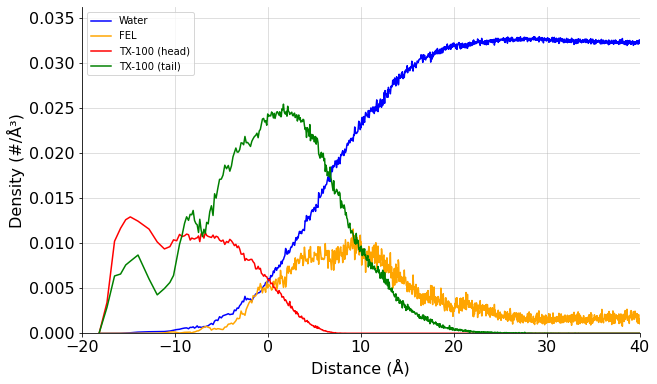

In [3]:
from PUCHIK import Interface
import matplotlib.pyplot as plt

# Define file paths
trj = 'project3/fel_trx/merged_fel.xtc'
top = 'project3/fel_trx/fel900ns.tpr'

# Initialize the Interface with trajectory and topology files
m = Interface(trj, top)

# Select all atoms and structure for the calculations
m.select_atoms('all')
m.select_structure('resname TRITO and (name C19 C20 C21 C22 C23 C24)')  # Setting TRITO as the interface structure

# Dictionary to store density data for each group
density_data = {}

# Calculate density for each atom group
# Water (SOL)
density_selection_sol = 'resname SOL'
distances_sol, densities_sol = m.calculate_density(density_selection_sol, start=0, end=1000, skip=2, norm_bin_count=12)
densities_sol = [d/3 for d in densities_sol]
density_data['Water'] = (distances_sol, densities_sol)

# ASP
density_selection_asp = 'resname FEL'
distances_asp, densities_asp = m.calculate_density(density_selection_asp, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['FEL'] = (distances_asp, densities_asp)

# OLE Heads within TRITO (using oxygen atoms as heads)
density_selection_ole_heads = 'resname TRITO and (name C19 C20 C21 C22 C23 C24)'  # Selects all oxygen atoms as head group
distances_ole_heads, densities_ole_heads = m.calculate_density(density_selection_ole_heads, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (head)'] = (distances_ole_heads, densities_ole_heads)

# OLE Tails within TRITO (using carbon atoms as tails)
density_selection_ole_tails = 'resname TRITO and (name C* O*) and not (name C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32)'  # Selects all carbon atoms as tail group
distances_ole_tails, densities_ole_tails = m.calculate_density(density_selection_ole_tails, start=0, end=1000, skip=2, norm_bin_count=12)
density_data['TX-100 (tail)'] = (distances_ole_tails, densities_ole_tails)

# Plotting the density profiles for each atom group
plt.figure(figsize=(10, 6))

# Plot each group with different colors and labels
# Plot each group with specific colors
for label, (distances, densities) in density_data.items():
    if label == 'TX-100 (head)':
        plt.plot(distances, densities, label=label, color='red')
    elif label == 'TX-100 (tail)':
        plt.plot(distances, densities, label=label, color='green')
    elif label == 'Water':
        plt.plot(distances, densities, label=label, color='blue')
    elif label == 'FEL':
        plt.plot(distances, densities, label=label, color='orange')

# Customize the plot
plt.xlabel("Distance (Å)",fontsize=16)
plt.ylabel("Density (#/Å³)",fontsize=16)
#plt.title("Density Profiles of SOL, ASP, and OLE Heads/Tails in TRITO")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)

# Adjust axis limits and positioning
plt.xlim(-20, 40)  # Match the x-axis range from reference
ymax = max([max(densities) for _, densities in density_data.values()])
plt.ylim(0, ymax * 1.1)  # Add 10% padding to top

# Remove axis spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Position y-axis at x=-20
ax.spines['left'].set_position(('data', -20))
ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=16)  # Increased x-axis tick labels font size
plt.yticks(fontsize=16)  # Increased y-axis tick labels font size

plt.savefig('densityfel_t1000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
